In [6]:
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

In [7]:
df = pd.read_csv(r'C:\Users\DELL\Documents\7th sem\PA\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df1 = pd.get_dummies(df['Sex'])
df1.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [12]:
df = pd.concat([df, df1], axis=1).reindex(df.index)
df.drop('Sex', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [17]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
df.dropna(inplace=True)
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,2,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,2,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,2,1,0
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,2,1,0


In [19]:
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
df.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
1,2,1,1,38.0,1,0,71.2833,0,1,0
3,4,1,1,35.0,1,0,53.1000,2,1,0
6,7,0,1,54.0,0,0,51.8625,2,0,1


<AxesSubplot:>

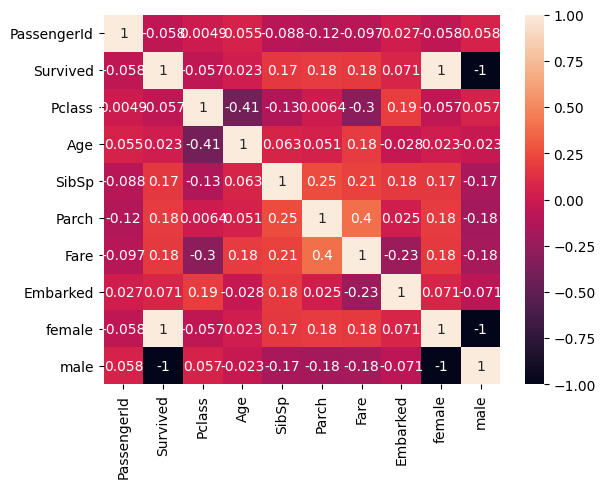

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X, y)

In [ ]:
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
featurescores = pd.concat([columns, scores], axis=1)
featurescores.columns = ['Specs', 'Score']
featurescores.nlargest(5, 'Score')

,Specs,Score
5,Fare,218.493185
8,male,44.000000
7,female,43.000000
4,Parch,4.350951
0,PassengerId,4.252916
